# Programa de la solución de las trayectorias cuánticas para el sistema de 3 niveles.
## Distribución de periodos brillantes y obscuros 
## Distrubución de tiempos de espera
## Distribución de conteo de fotones 

## Figura del proyecto


<img src="3LAkev.png" alt="a" class="bg-primary mb-1" width="400px">


In [6]:
import qutip 
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pylab import *


### La funcion basis es para el número de estados de Fock en el espacio de Hilbert. Si es una lista, entonces el objeto resultante será un producto tensorial  sobre espacios con esas dimensiones.


In [7]:
NF=3
Kg = basis(NF,2)
Ka = basis(NF,1)
Ke = basis(NF,0)

# Estado base
psi0 = Kg 

### Para describir los estados de sistemas cuánticos multipartitos (como dos qubits acoplados, un qubit acoplado a un oscilador, etc.) necesitamos expandir el espacio de Hilbert tomando el producto tensorial de los vectores de estado para cada uno de los componentes del sistema. De manera similar, los operadores que actúan sobre los vectores de estado en el espacio de Hilbert combinado (que describe el sistema acoplado) se forman tomando el producto tensorial de los operadores individuales.

In [8]:
Aaa = Ka*Ka.dag()
Aee = Ke*Ke.dag()
Agg = Kg*Kg.dag()
Aeg = Ke*Kg.dag()
Aag = Ka*Kg.dag()
Aea = Ke*Ka.dag()
Aae = Ka*Ke.dag()
Aga = Kg*Ka.dag()
Age = Kg*Ke.dag()

#Valores esperados
ket_a = Aaa #Definiendo los valores esperados con la diagonal principal
ket_e = Aee
ket_g = Agg

expect_values = [Aaa,
Aee,
Agg] #Los valores esperados se ponen en forma de lista, no se si importe su orden


### Parametros del experimento. 

In [46]:
Omega = 3.5 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 

gd = 0.05
g = 0.935
ntraj =1 # Numero de trayectorias 
tlist = np.linspace(0,500,100000)

#El numero de trayectorias necesarias para ver periodos brillantes y obscuros tiene que ser 1 
#De lo contrario como ensamble no se ve porque en el mismo coinciden periodos brillantes con los obscuros de otros 
#Esta parpadeo es caracteristico de puntos cuanticos, átomos y algunas moleculas 

### Operadores de colapso

In [47]:
# Operadores de colapso
Ceg = np.sqrt(g)*Age 
Cea = np.sqrt(gd)*Aae
Cag = np.sqrt(ga)*Aga
collapse = [Ceg ,Cea, Cag] #Ceg colapso 0, Cea colapso 1, Cag colapso 2


### Hamiltoniano

In [48]:
#Hamiltoniano del sistema, no se le añaden los terminos de los colapsos porque el programa de la solucion de montecarlo
#lo hace en automatico  con la funcion de liuvillian(H)
H = Delta * Aee + 0.5 * Omega * (Aeg + Age)

### Metodo de montecarlo para resolver las trayectorias cuanticas-

In [49]:

MC = mcsolve(H, psi0, tlist, collapse , expect_values, ntraj) 
#La funcion MC para resolver las trayectorias, H es el hamiltoniano, psi0 son las condiciones iniciales.
#tlist es el tiempo con delta t dependiendo de la funcion linspace, collapse los operadores de colapso, expect_values los 
#valores esperados y ntraj el numero de trayectorias.

100.0%. Run time:   0.00s. Est. time left: 00:00:00:00
Total run time:   9.42s


In [50]:
collapse = MC.col_which;
times = MC.col_times;
collapse_list = list(zip(collapse[0], times[0]))
lc=collapse_list
data = pd.DataFrame(collapse_list, columns=['colapso','tiempo'])
a=data[data['colapso']==2]
b=data[data['colapso']==1]
c=data[data['colapso']==0]

tamax=len(lc)


## Distribución de periodos brillantes y obscuros 

In [51]:
# Tiempo en el que ocurren los periodos oscuros
tod=0
toscuro=0
cnt=0
tdur=[]
tbdur=[]
tiempos=[]
tiemposb=[]
a=0
for i in lc:
    if lc[cnt][0] == 1 and cnt<tamax-2:
        tb=lc[cnt][1]-lc[a][1]
        tbdur.append(tb)
        tbrillante=tb
        tiemposb.append(lc[a][1])
        
        tod=lc[cnt+2][1]-lc[cnt][1]
        toscuro=toscuro+tod
        tdur.append(tod) 
        tdo=lc[cnt][1]+lc[cnt+2][1]
        tiempos.append(tdo*0.5)
        a=cnt
    cnt=cnt+1
tiempos.pop(0) 
tdur.pop(0) 
tiempos.pop(len(tiempos)-1) 
tdur.pop(len(tdur)-1) 

tiemposb.pop(0) 
tbdur.pop(0) 
tiemposb.pop(len(tiempos)-1) 
tbdur.pop(len(tdur)-1) 



147.7823738107548

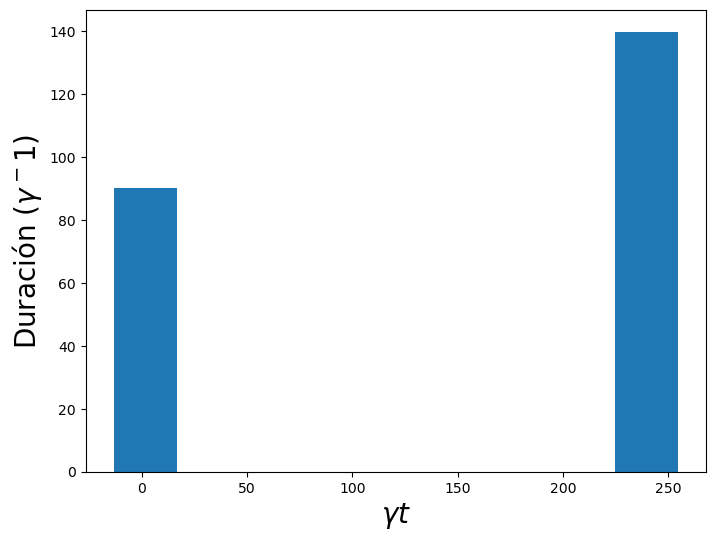

In [52]:
plt.figure(figsize=(8,6))
plt.bar(tiemposb,tbdur, label =r'tiempo en el que ocurre un periodo brillante',width=30)
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Duración ($\gamma^-1$)',fontsize=20)
tbrill=10000-toscuro

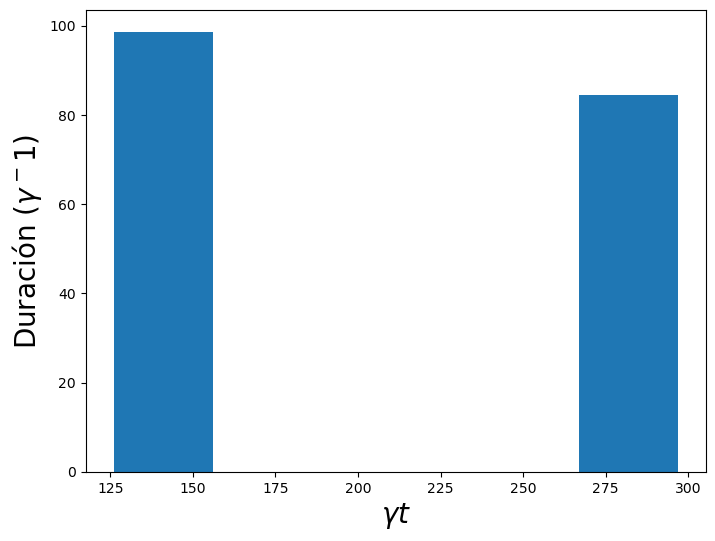

In [53]:
plt.figure(figsize=(8,6))
plt.bar(tiempos,tdur, label =r'tiempo en el que ocurre un periodo oscuro',width=30)
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Duración ($\gamma^-1$)',fontsize=20)
tbrill=10000-toscuro



Text(0, 0.5, 'Número de periodos oscuros')

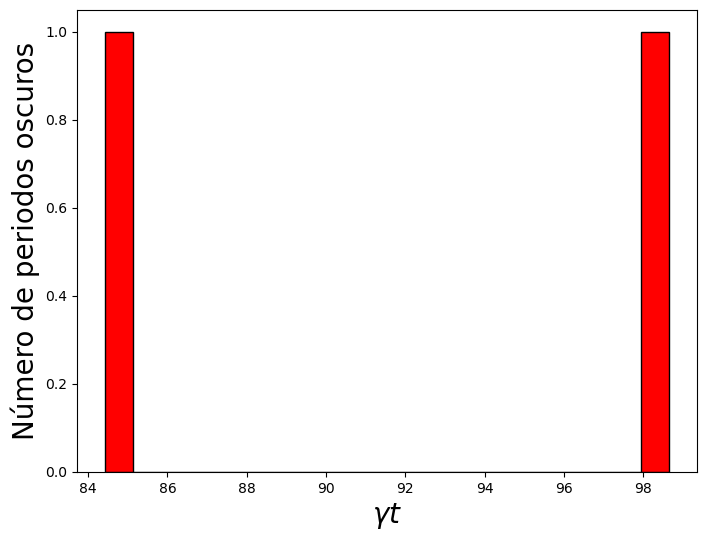

In [54]:
# Histograma de la duracion de periodos oscuros
plt.figure(figsize=(8,6))
plt.hist(tdur,20,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='red')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel('Número de periodos oscuros',fontsize=20)

Text(0, 0.5, 'Número de periodos oscuros')

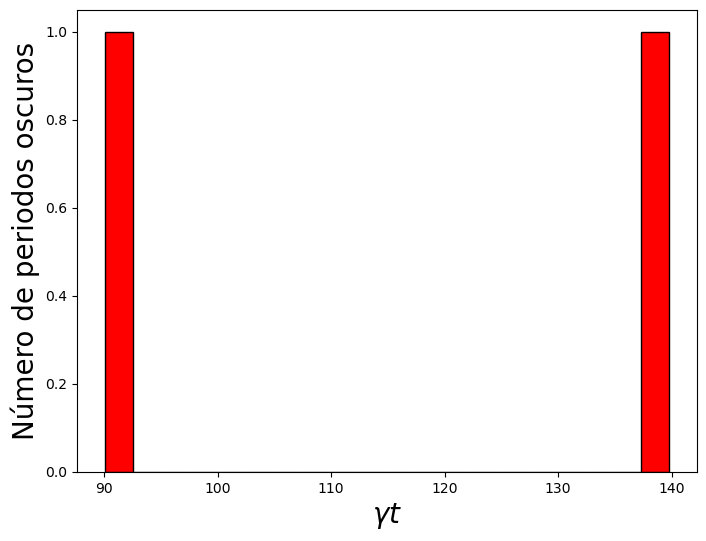

In [55]:
# Histograma de la duracion de periodos brillantes
plt.figure(figsize=(8,6))
plt.hist(tbdur,20,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='red')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel('Número de periodos oscuros',fontsize=20)

91.53580619195566

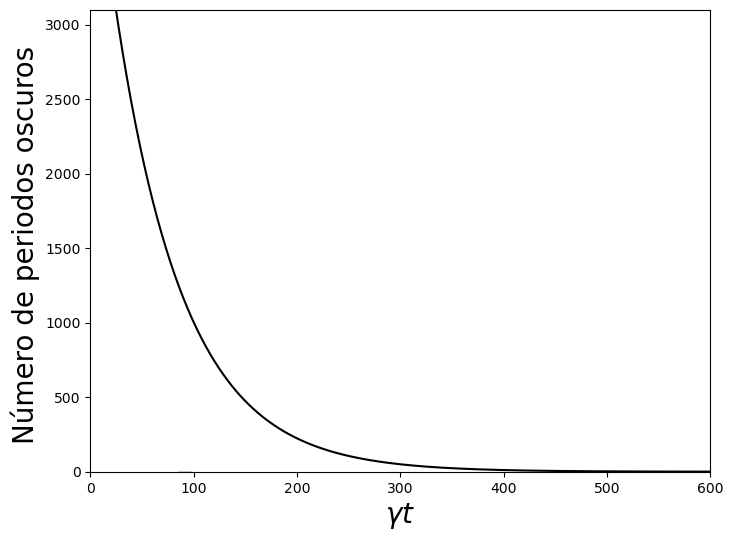

In [56]:
'''
Comparacion de los periodos brillantes y oscuros medidos con los de las formulas
Omega = 1 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.935
tlist
'''

#Promedio periodos oscuros
tlis = np.linspace(0,800,950)
a=np.mean(tdur)
Toc=1/ga
TBc=(2*Omega**3+g**2+4*Delta**2)/(gd*Omega**2)
POc=(300000)*(1/Toc)*exp(-tlis/Toc)
PBc=(1/Toc)*exp(-tlis/TBc)
plt.figure(figsize=(8,6))
plt.plot(tlis,POc,color="black")
plt.hist(tdur,bins=21,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='magenta')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Número de periodos oscuros ',fontsize=20)
plt.xlim(0,600)
plt.ylim(0,3100)
a

91.53580619195566

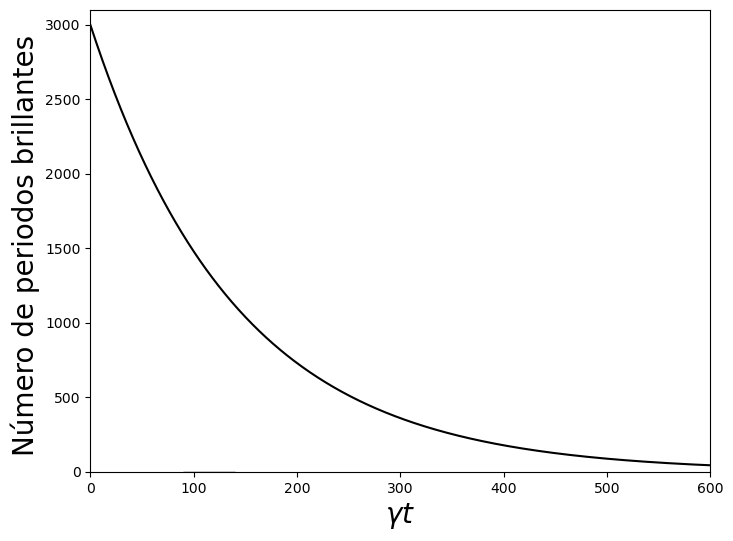

In [57]:
'''
Comparacion de los periodos brillantes y oscuros medidos con los de las formulas
Omega = 1 #Frecuencia de rabi
Delta = 0 #Desintonia
ga = 0.015 
gd = 0.05
g = 0.935
tlist
'''

#Promedio periodos oscuros
tlis = np.linspace(0,800,950)
a=np.mean(tdur)
Toc=1/ga
TBc=(2*Omega**3+g**2+4*Delta**2)/(gd*Omega**2)
POc=(300000)*(1/Toc)*exp(-tlis/Toc)
PBc=(200000)*(1/Toc)*exp(-tlis/TBc)
plt.figure(figsize=(8,6))
plt.plot(tlis,PBc,color="black")
plt.hist(tbdur,bins=21,histtype ='barstacked',label='Hisotograma de la duracion de periodos oscuros',rwidth=1,edgecolor='black',color='magenta')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'Número de periodos brillantes ',fontsize=20)
plt.xlim(0,600)
plt.ylim(0,3100)
a

## Poblaciones 

(0.0, 0.5)

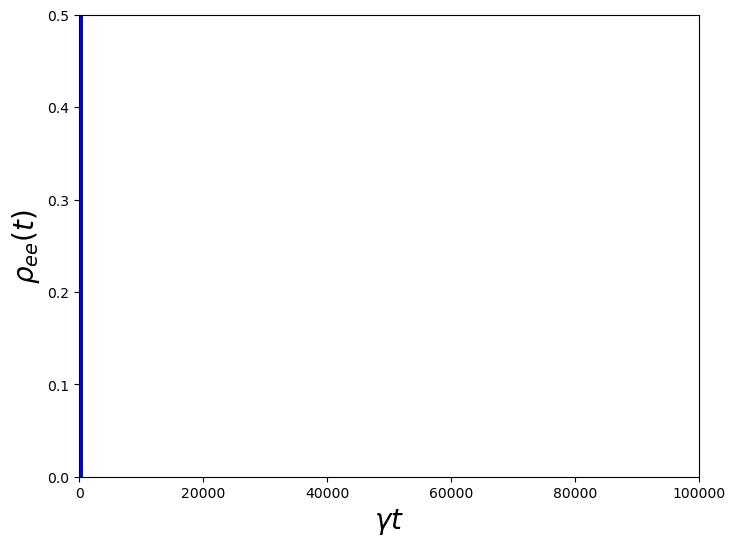

In [58]:

plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'blue')
#plt.plot(tlist,MC.expect[2], label =r'$\rho_{gg}(t)$', linestyle='dashdot',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
plt.xlim(0,100000)
plt.ylim(0,0.5)
#plt.legend(loc=1, prop={'size': 25})
#plt.savefig('Fig. 2a.pdf')
#plt.show()

(0.0, 1.0)

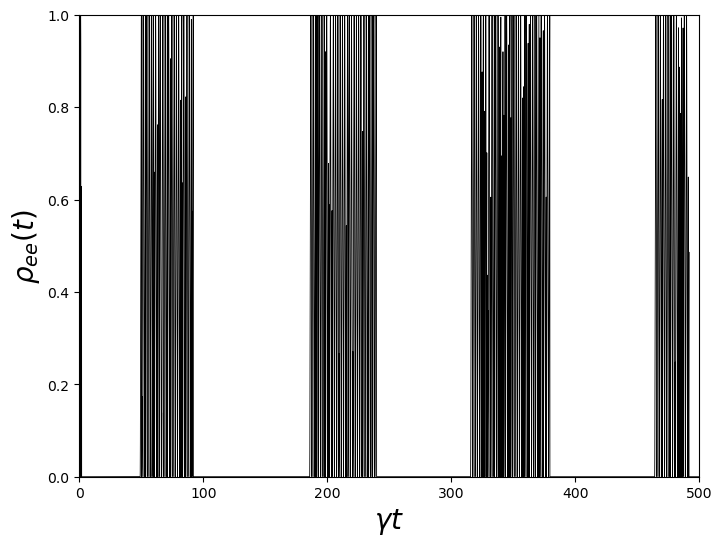

In [65]:

plt.figure(figsize=(8,6))
#plt.bar(tiempos,tdur,width=50,color='orange')

#plt.plot(tlist,MC.expect[0], label =r'$\rho_{aa}(t)$', linestyle='-',linewidth = 0.6, color = 'green')
plt.plot(tlist,MC.expect[1], label =r'$\rho_{ee}(t)$', linestyle='-',linewidth = 0.6, color = 'black')
#plt.plot(tlist,MC.expect[2], label =r'$\rho_{gg}(t)$', linestyle='dashdot',linewidth = 0.5, color = 'orange')
plt.xlabel(r'$\gamma t$',fontsize=20)
plt.ylabel(r'$\rho_{ee}(t)$',fontsize=20)
plt.xlim(0,500)
plt.ylim(0,1)
#plt.legend(loc=1, prop={'size': 25})
#plt.savefig('Fig. 2a.pdf')
#plt.show()

## 